In [1]:
import yfinance as yf
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import tqdm.auto as tqdm
import pickle

In [2]:
df=pd.read_csv('/kaggle/input/time-series-eda/HDFC.csv')
df.head(5)

,date,close,open,high,low,volume
0,1995-06-14,2.27,2.30,2.30,2.25,2070000.0
1,1995-06-15,2.26,2.28,2.31,2.25,4246000.0
2,1995-06-18,2.26,2.26,2.27,2.22,1798000.0
3,1995-06-19,2.25,2.26,2.26,2.24,2792000.0
4,1995-06-20,2.27,2.33,2.33,2.27,1182000.0


In [3]:
df['date']=pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7885 entries, 0 to 7884
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7885 non-null   datetime64[ns]
 1   close   7885 non-null   float64       
 2   open    7885 non-null   float64       
 3   high    7885 non-null   float64       
 4   low     7885 non-null   float64       
 5   volume  7885 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 369.7 KB


In [5]:
df.set_index('date',inplace=True)

In [6]:
df_hdfc=pd.DataFrame()

In [7]:
df_hdfc['Moving avg 30 days']=df['open'].rolling(30).mean()

In [8]:
df_hdfc.head()

,Moving avg 30 days
date,
1995-06-14,NaN
1995-06-15,NaN
1995-06-18,NaN
1995-06-19,NaN
1995-06-20,NaN


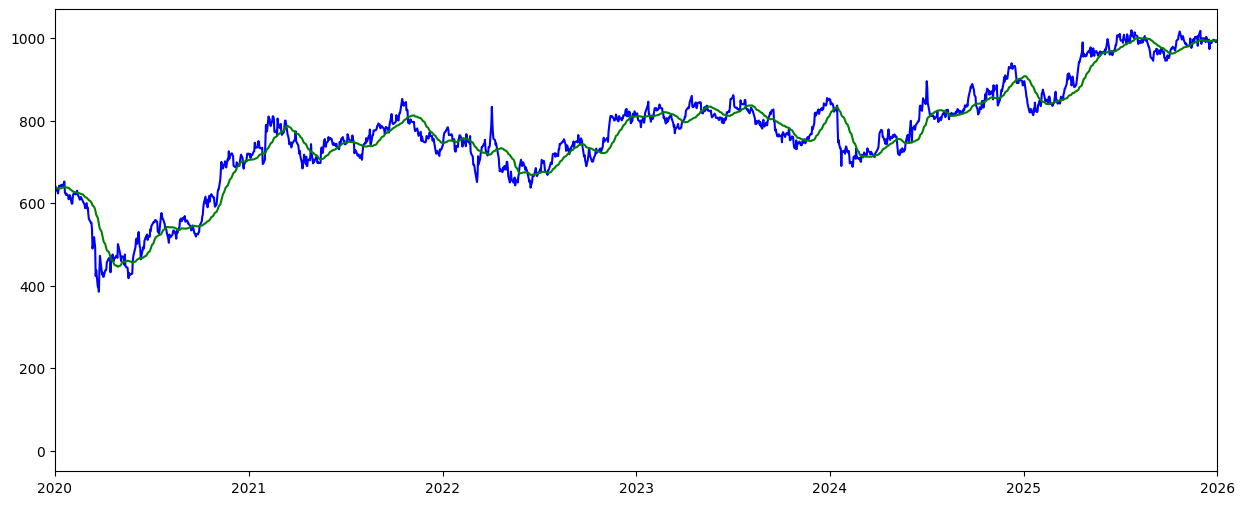

In [9]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['open'],color='b')
plt.plot(df_hdfc.index,df_hdfc['Moving avg 30 days'],color='g')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2026-01-01'))
plt.savefig('Open vs Simple Moving avg(30 days)')
plt.show()

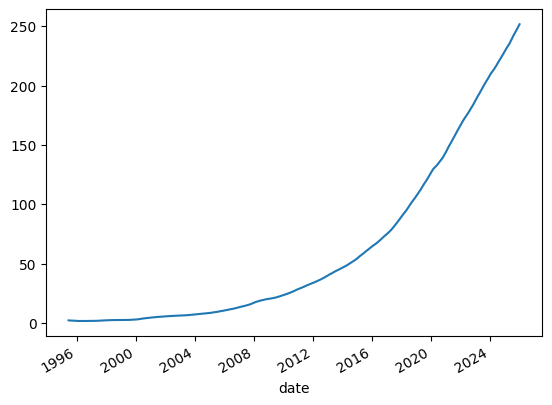

In [10]:
df['open'].expanding().mean().plot()
plt.savefig('Cumulative moving avg')
plt.show()

In [11]:
df_hdfc['EMA_.1']=df['open'].ewm(alpha=.1,adjust=False).mean()

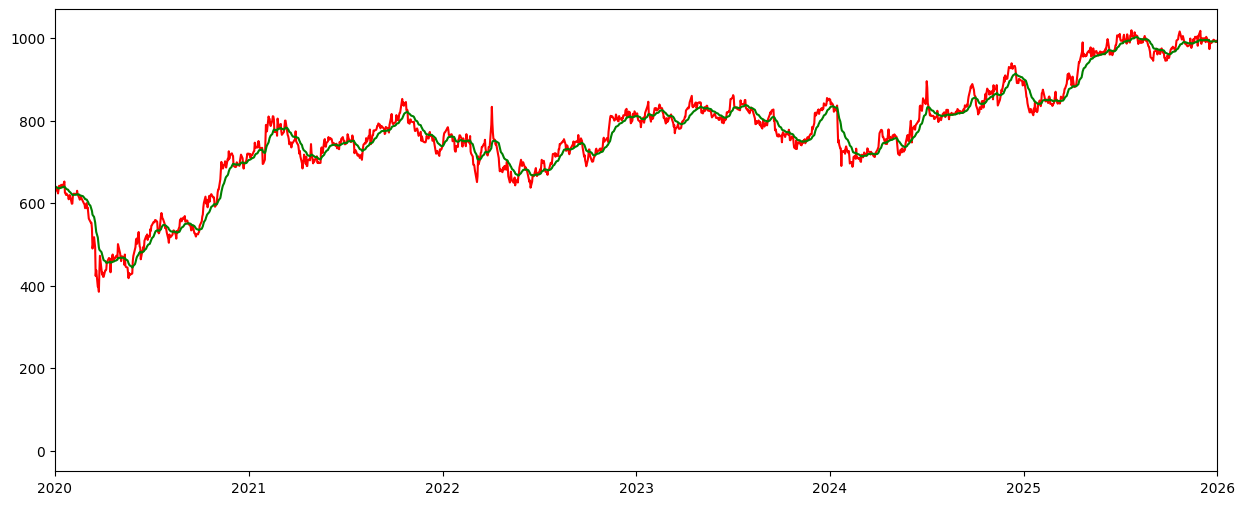

In [12]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['open'],color='r')
plt.plot(df_hdfc.index,df_hdfc['EMA_.1'],color='g')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2026-01-01'))
plt.savefig('Open vs Ema.png')
plt.show()

In [13]:
df_hdfc['EWMA_.1']=df['open'].ewm(span=5).mean()

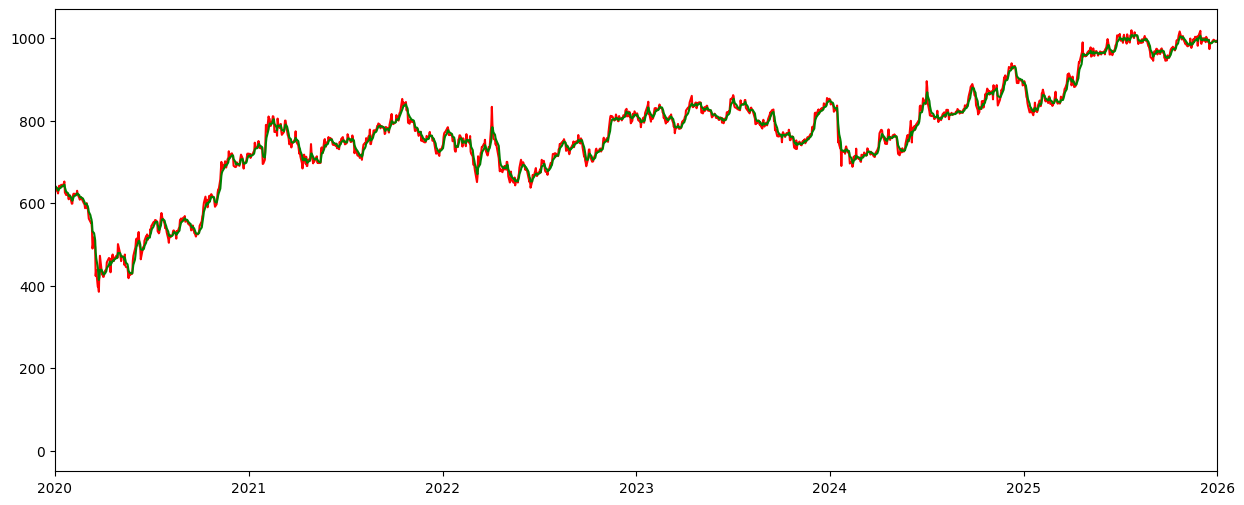

In [14]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['open'],color='r')
plt.plot(df_hdfc.index,df_hdfc['EWMA_.1'],color='g')
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2026-01-01'))
plt.savefig('Open vs Ewma.png')
plt.show()

In [15]:
import os
import glob
import subprocess
import shutil
from datetime import datetime
from kaggle_secrets import UserSecretsClient

GITHUB_USERNAME = "Zalanemoj"
GITHUB_REPO = "General"
GITHUB_EMAIL = "zalanemoj777@gmail.com"
GITHUB_DIR = "Outputs_Feature-adding"
BRANCH = "main"

FILES_TO_PUSH = ["*.csv", "*.png", "*.jpg", "*.json","*.pkl"]
FOLDERS_TO_PUSH = ["*"]

TOKEN = UserSecretsClient().get_secret("GITHUB_TOKEN")
REPO_URL = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{GITHUB_REPO}.git"

source = "/kaggle/working"
temp = "/kaggle/working/git_temp"

if os.path.exists(temp):
    shutil.rmtree(temp)
os.makedirs(temp)

os.chdir(temp)
subprocess.run(["git", "init"], capture_output=True)
subprocess.run(["git", "config", "user.email", GITHUB_EMAIL], capture_output=True)
subprocess.run(["git", "config", "user.name", GITHUB_USERNAME], capture_output=True)
subprocess.run(["git", "remote", "add", "origin", REPO_URL], capture_output=True)
subprocess.run(["git", "pull", "origin", BRANCH], capture_output=True)

target = os.path.join(temp, GITHUB_DIR)
os.makedirs(target, exist_ok=True)
IGNORE_FOLDERS = ["git_temp", ".virtual_documents", ".git"]
os.chdir(source)

print("Copying files:")
for pattern in FILES_TO_PUSH:
    for item in glob.glob(pattern):
        shutil.copy2(item, target)
        print(f"  ✓ {item}")

print("\nCopying folders:")
for pattern in FOLDERS_TO_PUSH:
    for folder in glob.glob(pattern):
        if any(ignored in folder for ignored in IGNORE_FOLDERS):
            continue

        if os.path.isdir(folder):
            dest = os.path.join(target, folder)
            if os.path.exists(dest):
                shutil.rmtree(dest)
            shutil.copytree(folder, dest)
            print(f"  ✓ {folder}/")

os.chdir(temp)
subprocess.run(["git", "add", "-A"], capture_output=True)
subprocess.run(["git", "commit", "-m", f"Update {datetime.now().strftime('%Y-%m-%d %H:%M')}"], capture_output=True)
subprocess.run(["git", "branch", "-M", BRANCH], capture_output=True)

result = subprocess.run(["git", "push", "-f", "origin", BRANCH], capture_output=True, text=True)

if result.returncode == 0:
    print(f"\n✅ Success! https://github.com/{GITHUB_USERNAME}/{GITHUB_REPO}/tree/{BRANCH}/{GITHUB_DIR}")
else:
    print(f"\n❌ Failed: {result.stderr}")

os.chdir(source)

Copying files:
  ✓ Open vs Ewma.png
  ✓ Open vs Ema.png
  ✓ Cumulative moving avg.png
  ✓ Open vs Simple Moving avg(30 days).png

Copying folders:

✅ Success! https://github.com/Zalanemoj/General/tree/main/Outputs_Feature-adding
